In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [3]:
#import restuarent data set 
data = pd.read_csv(r"C:\Users\13616\OneDrive\Desktop\assignment muhammad\Indian_Flight_Data-main\menu_items.csv")
data.head()

,menu_item_id,item_name,category,price
0,101,Hamburger,American,12.95
1,102,Cheeseburger,American,13.95
2,103,Hot Dog,American,9.00
3,104,Veggie Burger,American,10.50
4,105,Mac & Cheese,American,7.00


In [4]:
data1 = pd.read_csv(r"C:\Users\13616\OneDrive\Desktop\assignment muhammad\Indian_Flight_Data-main\order_details.csv")
data1.head()

,order_details_id,order_id,order_date,order_time,item_id
0,1,1,1/1/2023,11:38:36 AM,109.0
1,2,2,1/1/2023,11:57:40 AM,108.0
2,3,2,1/1/2023,11:57:40 AM,124.0
3,4,2,1/1/2023,11:57:40 AM,117.0
4,5,2,1/1/2023,11:57:40 AM,129.0


In [12]:
print(data)#view the full menu_item table.

    menu_item_id              item_name  category  price
0            101              Hamburger  American  12.95
1            102           Cheeseburger  American  13.95
2            103                Hot Dog  American   9.00
3            104          Veggie Burger  American  10.50
4            105           Mac & Cheese  American   7.00
5            106           French Fries  American   7.00
6            107         Orange Chicken     Asian  16.50
7            108          Tofu Pad Thai     Asian  14.50
8            109       Korean Beef Bowl     Asian  17.95
9            110             Pork Ramen     Asian  17.95
10           111        California Roll     Asian  11.95
11           112            Salmon Roll     Asian  14.95
12           113                Edamame     Asian   5.00
13           114            Potstickers     Asian   9.00
14           115          Chicken Tacos   Mexican  11.95
15           116            Steak Tacos   Mexican  13.95
16           117        Chicken

In [14]:
len(data)

32

In [15]:
data.shape

(32, 4)

In [16]:
data['item_name'].value_counts()

item_name
Hamburger                1
Cheeseburger             1
Hot Dog                  1
Veggie Burger            1
Mac & Cheese             1
French Fries             1
Orange Chicken           1
Tofu Pad Thai            1
Korean Beef Bowl         1
Pork Ramen               1
California Roll          1
Salmon Roll              1
Edamame                  1
Potstickers              1
Chicken Tacos            1
Steak Tacos              1
Chicken Burrito          1
Steak Burrito            1
Chicken Torta            1
Steak Torta              1
Cheese Quesadillas       1
Chips & Salsa            1
Chips & Guacamole        1
Spaghetti                1
Spaghetti & Meatballs    1
Fettuccine Alfredo       1
Meat Lasagna             1
Cheese Lasagna           1
Mushroom Ravioli         1
Shrimp Scampi            1
Chicken Parmesan         1
Eggplant Parmesan        1
Name: count, dtype: int64

In [18]:
data['category'].value_counts() # number of items of each catagories

category
Italian     9
Mexican     9
Asian       8
American    6
Name: count, dtype: int64

In [21]:
data[data['category'] == 'Italian'].shape[0] #how many items in the italian catagory

9

In [31]:
data[data['category'] == 'Asian'].shape[0]

8

In [33]:
data.loc[data['category'] == 'Italian', 'item_name'].tolist() # different italian dishes 

['Spaghetti',
 'Spaghetti & Meatballs',
 'Fettuccine Alfredo',
 'Meat Lasagna',
 'Cheese Lasagna',
 'Mushroom Ravioli',
 'Shrimp Scampi',
 'Chicken Parmesan',
 'Eggplant Parmesan']

In [34]:
data.loc[data['category'] == 'Italian', 'item_name'].tolist() # another way

['Spaghetti',
 'Spaghetti & Meatballs',
 'Fettuccine Alfredo',
 'Meat Lasagna',
 'Cheese Lasagna',
 'Mushroom Ravioli',
 'Shrimp Scampi',
 'Chicken Parmesan',
 'Eggplant Parmesan']

In [36]:
data.loc[data['category'] == 'Italian', 'price'].mean() # avagare price of Italian category items

np.float64(16.75)

In [39]:
data.groupby('category')['price'].mean() ## avarage price of all categories

category
American    10.066667
Asian       13.475000
Italian     16.750000
Mexican     11.800000
Name: price, dtype: float64

In [44]:
data.loc[data['price'].idxmax(), 'item_name',] ## most expensive item on the menu

'Shrimp Scampi'

In [47]:

data.loc[data['price'].idxmin(), 'item_name'] #least expensive item on the menu

'Edamame'

In [49]:
data.loc[data.groupby('category')['price'].idxmax()] ## the most expensive item per category.

,menu_item_id,item_name,category,price
1,102,Cheeseburger,American,13.95
8,109,Korean Beef Bowl,Asian,17.95
29,130,Shrimp Scampi,Italian,19.95
17,118,Steak Burrito,Mexican,14.95


In [51]:
data.groupby('category')['price'].idxmax().apply(lambda x: data.loc[x, 'item_name']) ## just names per category

category
American        Cheeseburger
Asian       Korean Beef Bowl
Italian        Shrimp Scampi
Mexican        Steak Burrito
Name: price, dtype: object

In [56]:
data.nlargest(5, 'price')## 5 most expensive items of all categories


,menu_item_id,item_name,category,price,price_rank
29,130,Shrimp Scampi,Italian,19.95,1.0
8,109,Korean Beef Bowl,Asian,17.95,2.0
9,110,Pork Ramen,Asian,17.95,2.0
24,125,Spaghetti & Meatballs,Italian,17.95,2.0
26,127,Meat Lasagna,Italian,17.95,2.0


In [60]:
data['price_rank'] = data['price'].rank(ascending=False, method='min') ##price ranking

In [63]:
data.sort_values('price_rank')

,menu_item_id,item_name,category,price,price_rank
29,130,Shrimp Scampi,Italian,19.95,1.0
9,110,Pork Ramen,Asian,17.95,2.0
26,127,Meat Lasagna,Italian,17.95,2.0
8,109,Korean Beef Bowl,Asian,17.95,2.0
30,131,Chicken Parmesan,Italian,17.95,2.0
24,125,Spaghetti & Meatballs,Italian,17.95,2.0
31,132,Eggplant Parmesan,Italian,16.95,7.0
6,107,Orange Chicken,Asian,16.50,8.0
27,128,Cheese Lasagna,Italian,15.50,9.0
28,129,Mushroom Ravioli,Italian,15.50,9.0


In [61]:
data.loc[data.groupby('category')['price'].idxmax()]

,menu_item_id,item_name,category,price,price_rank
1,102,Cheeseburger,American,13.95,16.0
8,109,Korean Beef Bowl,Asian,17.95,2.0
29,130,Shrimp Scampi,Italian,19.95,1.0
17,118,Steak Burrito,Mexican,14.95,11.0


<BarContainer object of 32 artists>

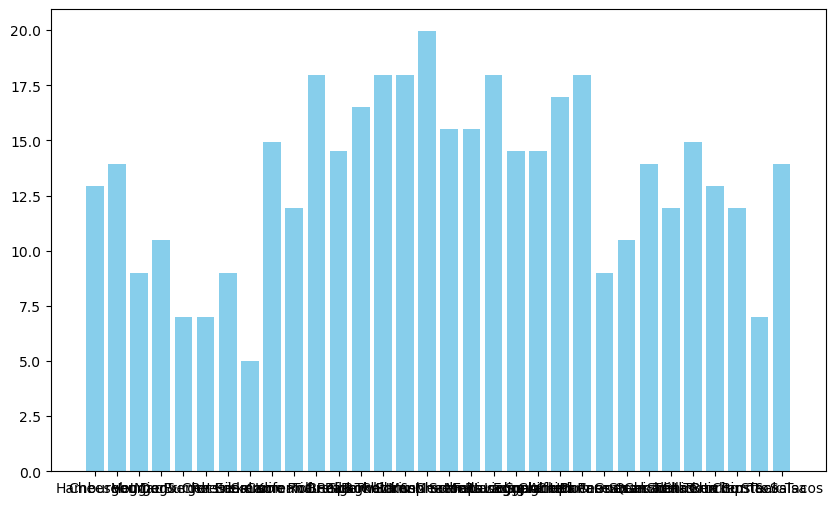

In [68]:
import matplotlib.pyplot as plt

# Sort items by category for better visualization
data_sorted = data.sort_values('category')

plt.figure(figsize=(10,6))
plt.bar(data_sorted['item_name'], data_sorted['price'], color='skyblue')


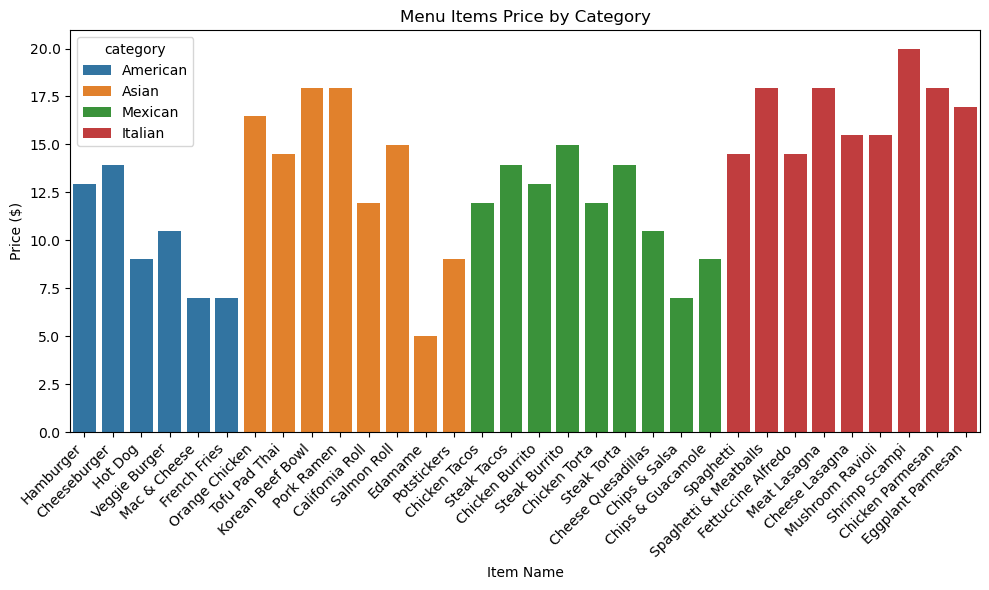

In [70]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.barplot(x='item_name', y='price', hue='category', data=data)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Item Name')
plt.ylabel('Price ($)')
plt.title('Menu Items Price by Category')
plt.tight_layout()
plt.show()

C:\Users\13616\AppData\Local\Temp\ipykernel_27676\400161854.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='category', y='price', data=avg_price, palette='Set2')


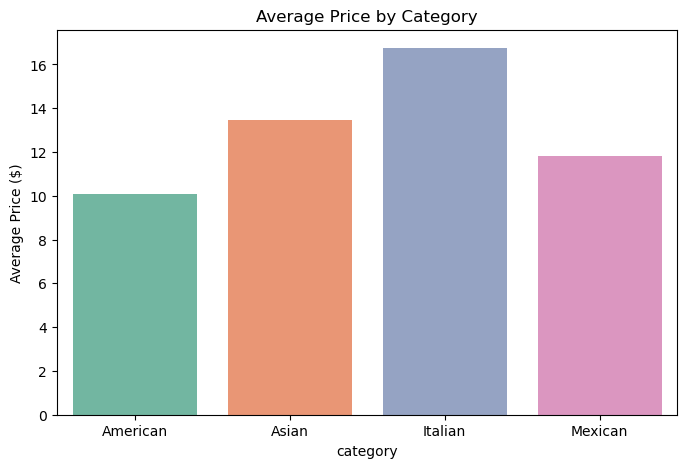

In [71]:
avg_price = data.groupby('category')['price'].mean().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(x='category', y='price', data=avg_price, palette='Set2')
plt.ylabel('Average Price ($)')
plt.title('Average Price by Category')
plt.show()

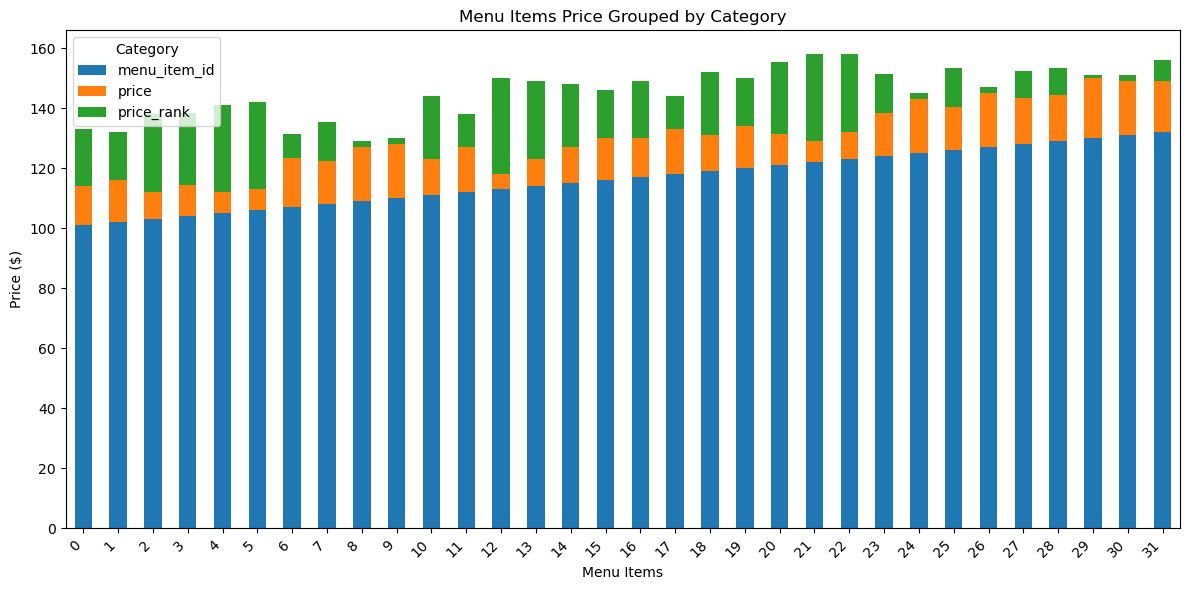

In [75]:
data.plot(kind='bar', stacked=True, figsize=(12,6))

plt.xlabel('Menu Items')
plt.ylabel('Price ($)')
plt.title('Menu Items Price Grouped by Category')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Category')
plt.tight_layout()
plt.show()









